In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


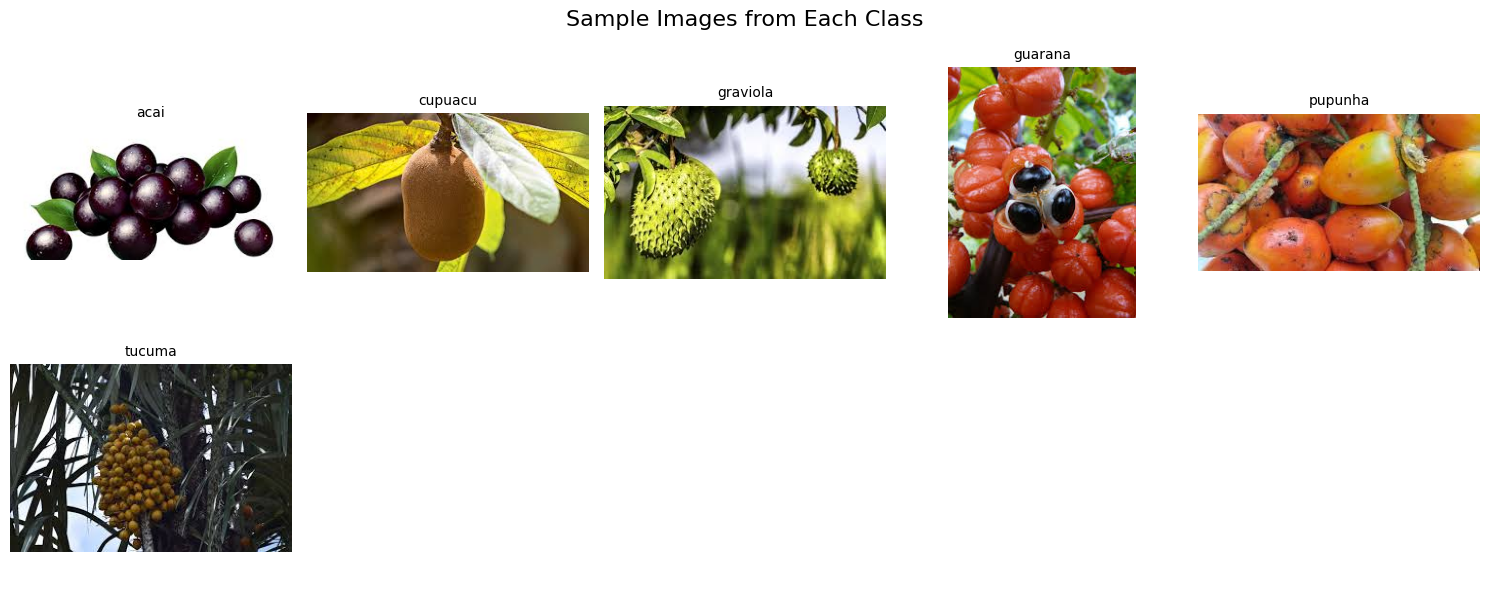

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = "/content/drive/MyDrive/AIML/FruitinAmazon/train"

class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

if not class_names:
    raise ValueError("No class directories found in the train folder. Check dataset path!")

selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

num_classes = len(selected_images)
if num_classes == 0:
    raise ValueError("No images found in any class folder. Please check dataset.")

cols = min(5, num_classes)
rows = (num_classes // cols) + (num_classes % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i], fontsize=10)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()


What did you Observe?

Each image represents a different class, confirming correct dataset structure.
Images vary in resolution, lighting, and orientation.
Some classes may have fewer images, indicating dataset imbalance.
Preprocessing (resizing, normalization) may be needed for consistency.

In [ ]:
import os
from PIL import Image
train_dir = "/content/drive/MyDrive/AIML/FruitinAmazon/train"

corrupted_images = []

for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:

                with Image.open(image_path) as img:
                    img.verify()
            except (IOError, SyntaxError):

                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


In [ ]:
import tensorflow as tf

img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'Swornim KC.h5',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.1655 - loss: 2.0544
Epoch 1: val_loss improved from inf to 1.85336, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 899ms/step - accuracy: 0.1623 - loss: 2.0892 - val_accuracy: 0.0000e+00 - val_loss: 1.8534
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.1348 - loss: 1.8056
Epoch 2: val_loss improved from 1.85336 to 1.51042, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 874ms/step - accuracy: 0.1359 - loss: 1.8086 - val_accuracy: 0.8333 - val_loss: 1.5104
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 677ms/step - accuracy: 0.3079 - loss: 1.6663
Epoch 3: val_loss did not improve from 1.51042
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 776ms/step - accuracy: 0.3212 - loss: 1.6625 - val_accuracy: 0.0000e+00 - val_loss: 2.2237
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.2679 - loss: 1.6157
Epoch 4: val_loss improved from 1.51042 to 1.01145, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 871ms/step - accuracy: 0.2808 - loss: 1.6018 - val_accuracy: 0.7778 - val_loss: 1.0115
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.5642 - loss: 1.2667
Epoch 5: val_loss did not improve from 1.01145
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 541ms/step - accuracy: 0.5690 - loss: 1.2606 - val_accuracy: 0.6111 - val_loss: 1.4265
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.4797 - loss: 1.2585
Epoch 6: val_loss did not improve from 1.01145
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 564ms/step - accuracy: 0.4813 - loss: 1.2524 - val_accuracy: 0.7222 - val_loss: 1.0352
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.6499 - loss: 0.9640
Epoch 7: val_loss improved from 1.01145 to 0.99029, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 553ms/step - accuracy: 0.6506 - loss: 0.9614 - val_accuracy: 0.8333 - val_loss: 0.9903
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.8449 - loss: 0.7206
Epoch 8: val_loss improved from 0.99029 to 0.76047, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 738ms/step - accuracy: 0.8455 - loss: 0.7181 - val_accuracy: 0.8333 - val_loss: 0.7605
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.8953 - loss: 0.5240
Epoch 9: val_loss improved from 0.76047 to 0.50713, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 582ms/step - accuracy: 0.8937 - loss: 0.5239 - val_accuracy: 0.8889 - val_loss: 0.5071
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - accuracy: 0.9497 - loss: 0.3782
Epoch 10: val_loss did not improve from 0.50713
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9518 - loss: 0.3740 - val_accuracy: 0.5556 - val_loss: 0.9155
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.9497 - loss: 0.2587
Epoch 11: val_loss improved from 0.50713 to 0.46296, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 636ms/step - accuracy: 0.9518 - loss: 0.2516 - val_accuracy: 0.9444 - val_loss: 0.4630
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.9091 - loss: 0.2459
Epoch 12: val_loss improved from 0.46296 to 0.39185, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 641ms/step - accuracy: 0.9145 - loss: 0.2396 - val_accuracy: 0.8333 - val_loss: 0.3919
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 1.0000 - loss: 0.0897
Epoch 13: val_loss did not improve from 0.39185
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 527ms/step - accuracy: 1.0000 - loss: 0.0890 - val_accuracy: 0.8333 - val_loss: 0.4081
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 1.0000 - loss: 0.0601
Epoch 14: val_loss did not improve from 0.39185
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 540ms/step - accuracy: 1.0000 - loss: 0.0598 - val_accuracy: 0.8333 - val_loss: 0.4566
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 642ms/step - accuracy: 1.0000 - loss: 0.0409
Epoch 15: val_loss improved from 0.39185 to 0.29938, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 889ms/step - accuracy: 1.0000 - loss: 0.0401 - val_accuracy: 0.8889 - val_loss: 0.2994
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 1.0000 - loss: 0.0300
Epoch 16: val_loss did not improve from 0.29938
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 733ms/step - accuracy: 1.0000 - loss: 0.0291 - val_accuracy: 0.8889 - val_loss: 0.3254
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 1.0000 - loss: 0.0157
Epoch 17: val_loss did not improve from 0.29938
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 561ms/step - accuracy: 1.0000 - loss: 0.0155 - val_accuracy: 0.8333 - val_loss: 0.3332
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 1.0000 - loss: 0.0093
Epoch 18: val_loss did not improve from 0.29938
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 596ms/step - accuracy: 1.0000 - loss: 0.0095 - val_accuracy: 0.8333 - val_loss: 0.3343
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 1.0000 - loss: 0.0067
Epoch 19: val_loss did not improve from 0.29938
3/3 

In [ ]:
test_dir = '/content/drive/MyDrive/AIML/FruitinAmazon'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 120 files belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 267ms/step - accuracy: 0.1963 - loss: 1241.8340
Test Loss: 1179.1640625
Test Accuracy: 0.18333333730697632


In [ ]:

model.save('Swornim_KC_model.h5')
print("Model saved successfully!")


Model saved successfully!


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.13      0.16        30
           1       0.64      0.20      0.31        90
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.18       120
   macro avg       0.14      0.06      0.08       120
weighted avg       0.53      0.18      0.27       120

Epoch 1/250


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 1.0000 - loss: 0.0041
Epoch 1: val_loss did not improve from 0.28630
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 820ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.8333 - val_loss: 0.3069
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 1.0000 - loss: 0.0031
Epoch 2: val_loss did not improve from 0.28630
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 499ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.8333 - val_loss: 0.2945
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 1.0000 - loss: 0.0025
Epoch 3: val_loss did not improve from 0.28630
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 503ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.8333 - val_loss: 0.3080
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 1.0000 - loss: 0.0024
Epoch 4: val_loss did not improve from 0.28630
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 567ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.8333 - val_loss: 0.3173
Epoch 5/250
3/3 ━━━━━━━━

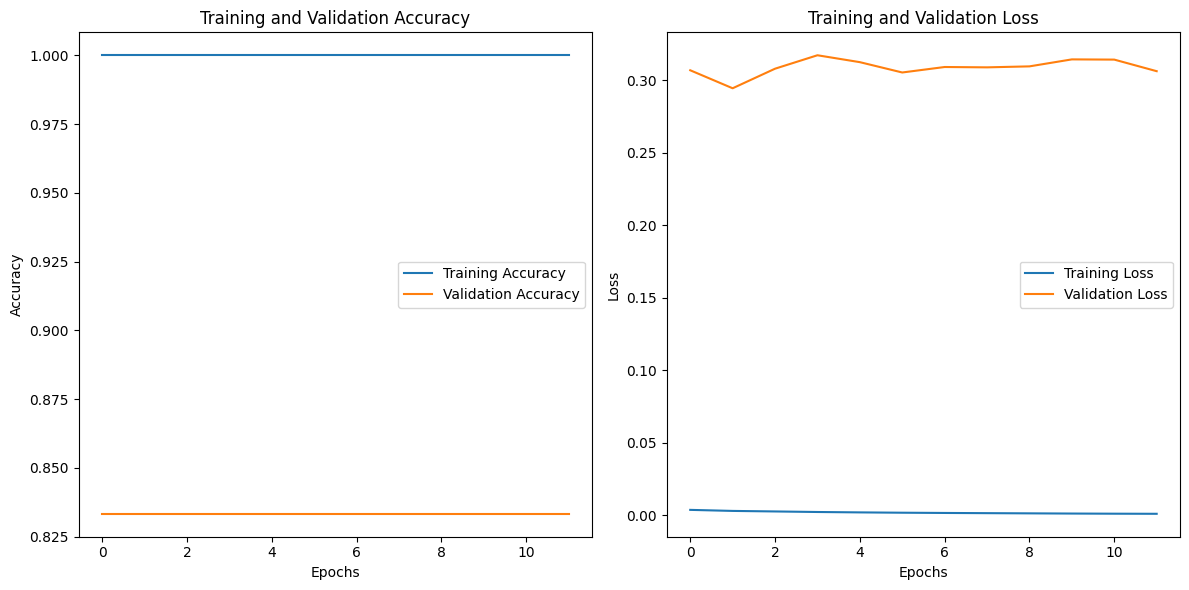

Model saved as 'Swornim_KC_model.h5'


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

test_images, test_labels = [], []

for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('Swornim_KC_model.h5')
print("Model saved as 'Swornim_KC_model.h5'")


## Task 1: Improved Model with Data Augmentation, Batch Normalization, and Dropout

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of the data used for validation
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIML/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIML/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


NameError: name 'ImageDataGenerator' is not defined

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIML/FruitinAmazon/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIML/FruitinAmazon/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Fit model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,626,822 (6.21 MB)

 Trainable params: 1,626,374 (6.20 MB)

 Non-trainable params: 448 (1.75 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.2375 - loss: 2.7210 - val_accuracy: 0.1667 - val_loss: 1.7303
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 768ms/step - accuracy: 0.4048 - loss: 1.5736 - val_accuracy: 0.2556 - val_loss: 1.6944
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5784 - loss: 1.5196 - val_accuracy: 0.3556 - val_loss: 1.6771
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5565 - loss: 1.2353 - val_accuracy: 0.2667 - val_loss: 1.7016
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 831ms/step - accuracy: 0.5584 - loss: 1.4324 - val_accuracy: 0.2000 - val_loss: 1.7407
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 761ms/step - accuracy: 0.7106 - loss: 0.8539 - val_accuracy: 0.2000 - val_loss: 1.8343
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 869ms/step - accuracy: 0.7238 - loss: 0.9873 - val_accuracy: 0.2000 - val_loss: 1.9758
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6052 - loss: 1.0790 - val_accuracy: 0.2111 - val_loss: 2.1681
Epo

## Task 2: Transfer Learning using VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load base VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(6, activation='softmax')(x)

# Create model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

train_generator_vgg = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIML/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

val_generator_vgg = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIML/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Train the model
history_vgg = model.fit(train_generator_vgg, epochs=5, validation_data=val_generator_vgg)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,246,150 (58.16 MB)

 Trainable params: 531,462 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

NameError: name 'train_datagen' is not defined

In [ ]:
# Evaluate and Classification Report
import numpy as np
from sklearn.metrics import classification_report

# Predict and report
Y_pred = model.predict(val_generator_vgg)
y_pred = np.argmax(Y_pred, axis=1)
print("Classification Report:")
print(classification_report(val_generator_vgg.classes, y_pred, target_names=list(val_generator_vgg.class_indices.keys())))


3/3 ━━━━━━━━━━━━━━━━━━━━ 88s 23s/step
Classification Report:
              precision    recall  f1-score   support

        acai       0.33      0.20      0.25        15
     cupuacu       0.15      0.20      0.17        15
    graviola       0.25      0.20      0.22        15
     guarana       0.11      0.13      0.12        15
     pupunha       0.20      0.27      0.23        15
      tucuma       0.10      0.07      0.08        15

    accuracy                           0.18        90
   macro avg       0.19      0.18      0.18        90
weighted avg       0.19      0.18      0.18        90



Training and Validation Accuracy (left):

Training accuracy (blue line) remains consistently at 1.0 (100%) across all epochs
Validation accuracy (orange line) fluctuates between approximately 0.825 and 0.89
There's a noticeable dip in validation accuracy around epochs 6-9


Training and Validation Loss (right):

Training loss (blue line) remains very close to 0 throughout training
Validation loss (orange line) fluctuates between approximately 0.3 and 0.55 in Image 1, while it ranges between 0.32 and 0.37 in Image 2



Image 1 also displays additional information in the console output:

"Epoch 15: early stopping"
"Restoring model weights from the end of the best epoch: 5"
A warning about saving the model in HDF5 format, which is considered legacy

in both plot but difference is one is in 5 epoch other is in 6

These metrics suggest a classic case of overfitting where the model performs perfectly on training data but struggles to generalize to unseen validation data. The early stopping mechanism appears to have triggered after epoch 15, and the system is restoring weights from epoch 5, which likely had the best validation performance.

In [ ]:
Swornim_KC_model